<a href="https://colab.research.google.com/github/msaltan/DataBootcamp2025/blob/main/jupysql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip list

In [ ]:
!pip install jupysql duckdb-engine

In [3]:
%load_ext sql

In [4]:
from pathlib import Path
from urllib.request import urlretrieve

if not Path("penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )

In [5]:
%sql duckdb://

Connecting to 'duckdb://'

In [6]:
%sql SELECT * FROM penguins.csv LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [7]:
%%sql
SELECT *
FROM penguins.csv
WHERE bill_length_mm > 40
LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,42.0,20.2,190,4250,None
Adelie,Torgersen,41.1,17.6,182,3200,FEMALE


In [8]:
%%sql --save not_nulls --no-execute
SELECT *
FROM penguins.csv
WHERE bill_length_mm IS NOT NULL
AND bill_depth_mm IS NOT NULL

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "Boxplot from 'not_nulls'"}>

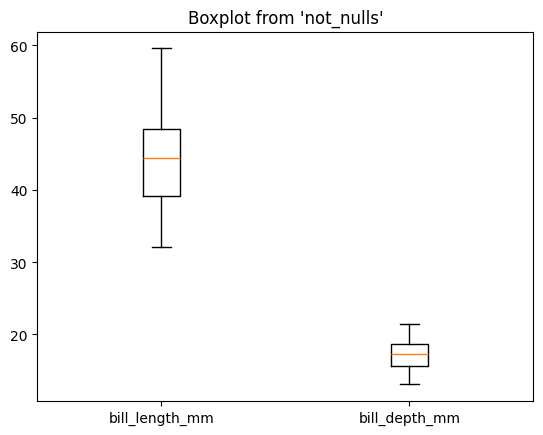

In [9]:
%sqlplot boxplot --column bill_length_mm bill_depth_mm --table not_nulls

<Axes: title={'center': "Histogram from 'not_nulls'"}, ylabel='Count'>

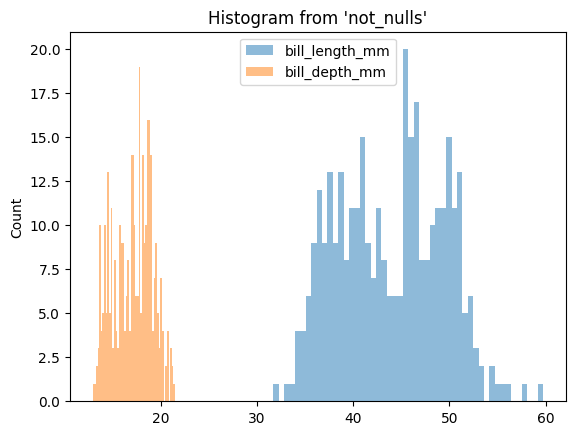

In [10]:
%sqlplot histogram --column bill_length_mm bill_depth_mm --table not_nulls

In [11]:
result = %sql SELECT * FROM penguins.csv

Running query in 'duckdb://'

In [12]:
df = result.DataFrame()

In [13]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
